### Siapakaan Model 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

In [2]:
def map_sentiment(sentiment):
    if sentiment == 1:
        return 'positif'
    elif sentiment == 0:
        return 'netral'
    else:
        return 'negatif'

In [3]:
def prepare_datasets(corpus, labels, test_data_proportion=0.3, random_state=42):
    train_X, test_X, train_Y, test_Y = train_test_split(corpus, labels,
                                                        test_size=test_data_proportion,
                                                        random_state=random_state)
    return train_X, test_X, train_Y, test_Y

In [4]:
def tfidf_extractor(corpus, ngram_range=(1,2)):
    vectorizer = TfidfVectorizer(min_df=1,
                                norm='l2',
                                smooth_idf=True,
                                use_idf=True,
                                ngram_range=ngram_range)
    features = vectorizer.fit_transform(corpus)
    return vectorizer, features

In [5]:
df = pd.read_csv('sentiment_5000.csv')
df.head(10)

,content,sentimen
0,capres nomor urut 1 anies baswedan merespons t...,Negative
1,calon wakil presiden nomor urut 1 muhaimin isk...,Negative
2,pemotor tewas tertimpa pohon melintas jalan je...,Negative
3,muhammad zinedine alam putra calon presiden no...,Negative
4,calon presiden capres nomor urut 1 anies baswe...,Negative
5,aksi pria pandeglang banten membagikan uang mo...,Negative
6,terdakwa pembunuhan berencana wowon erawan sol...,Negative
7,ayah berinisial mn 53 memperkosa anak kandungn...,Negative
8,unit mobil pikap mengangkut barang elektronik ...,Negative
9,komisi nasional perlindungan anak komnas pa fa...,Negative


In [6]:
# Split data
x_train, x_test, y_train, y_test = prepare_datasets(df['content'], df['sentimen'], test_data_proportion=0.3)

In [7]:
# Convert text labels to numerical labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Ensure the lengths match after splitting
y_train_encoded = y_train_encoded[:len(x_train)]
y_test_encoded = y_test_encoded[:len(x_test)]

In [8]:
# TF-IDF Vectorization
tfidf_vectorizer, tfidf_train_features = tfidf_extractor(x_train)
tfidf_test_features = tfidf_vectorizer.transform(x_test)

#### World Cloud

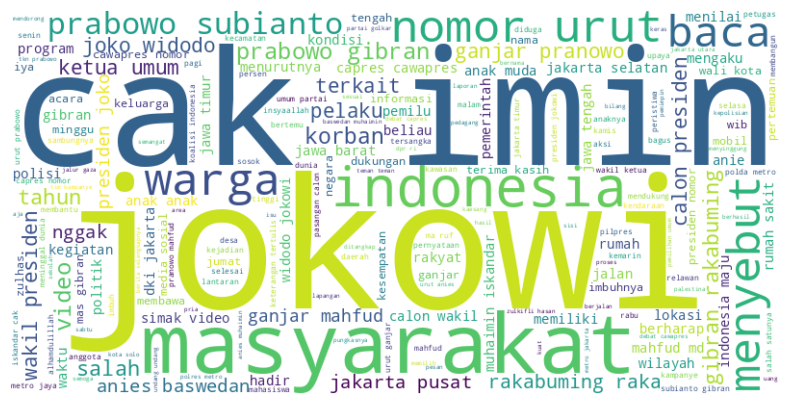

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all texts into one string
all_texts = ' '.join(df['content'])

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(all_texts)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


#### LSA

LSA Topics:

Topic #0:
prabowo gibran ganjar jokowi anies presiden mahfud indonesia cawapres imin

Topic #1:
korban imin cak cak imin israel pelaku anies gaza palestina firli

Topic #2:
imin cak imin cak anies muhaimin amin perubahan muhaimin iskandar baswedan anies baswedan

Topic #3:
ganjar mahfud ganjar mahfud pranowo ganjar pranowo mahfud md md pdip hukum tpn

Topic #4:
israel gaza hamas palestina serangan ganjar jalur gaza perang jokowi jalur

Topic #5:
jokowi pan zulhas firli kpk presiden syl partai menteri joko widodo

Topic #6:
firli israel kpk gaza gibran hamas syl bahuri firli bahuri debat

Topic #7:
pan zulhas gibran zulkifli zulkifli hasan hasan mahfud zita partai amanat kader

Topic #8:
jokowi gibran debat cawapres imin cak cak imin ikn harga pasar

Topic #9:
anies debat jalan jakarta harga mikrotrans dki pasar capres kpu


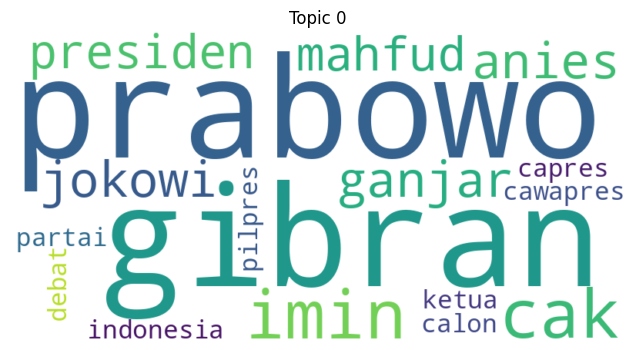

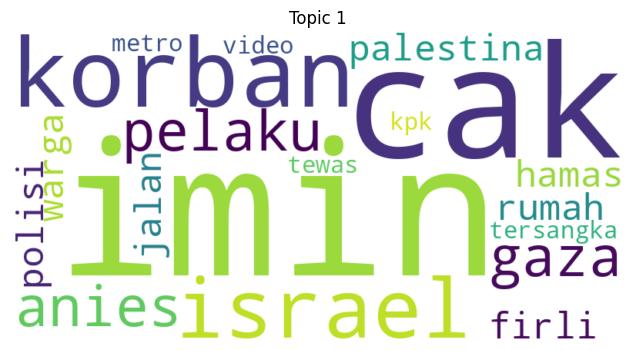

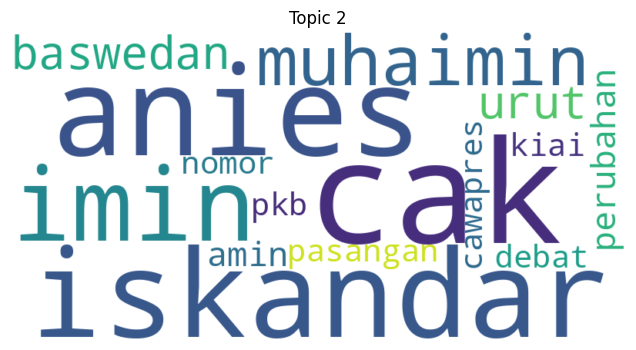

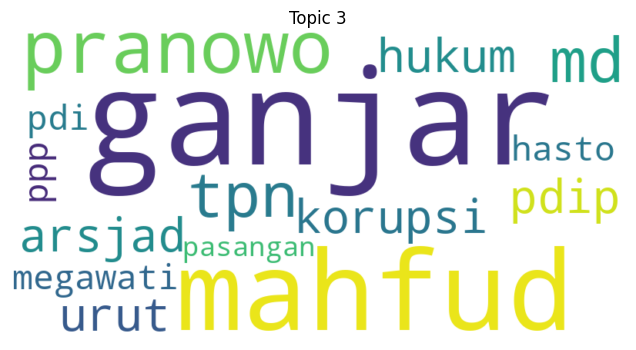

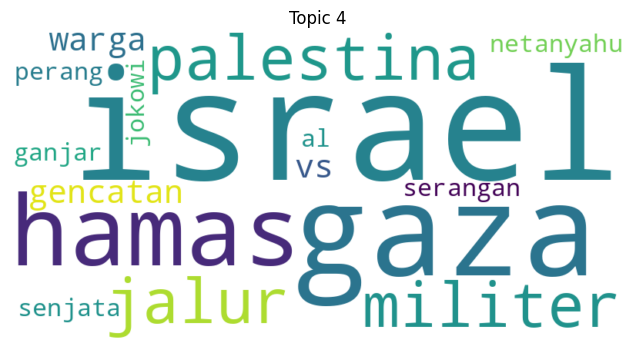

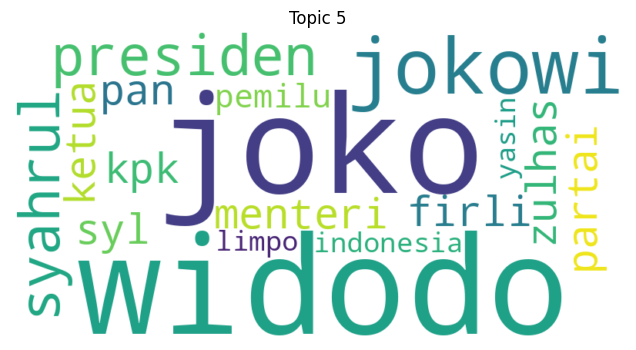

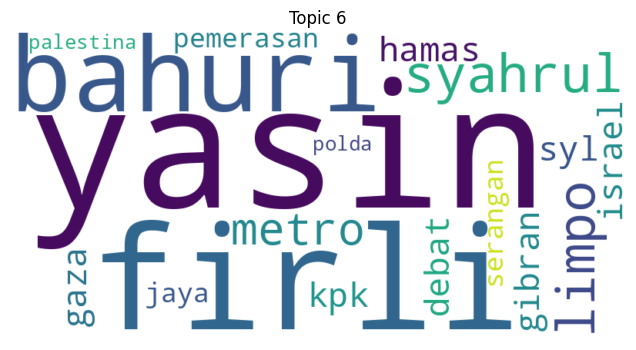

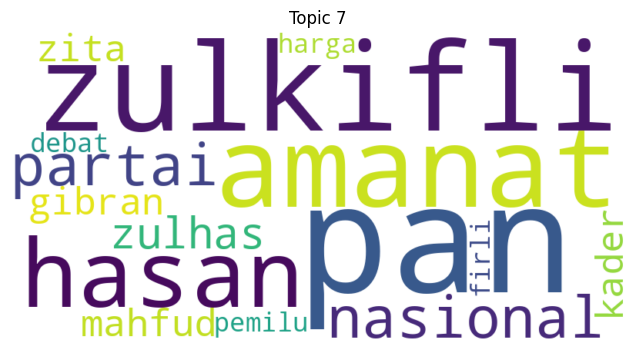

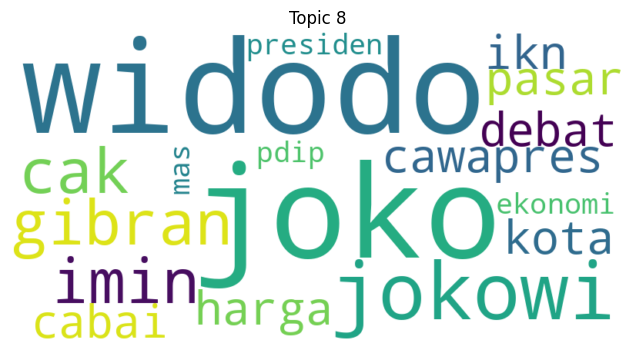

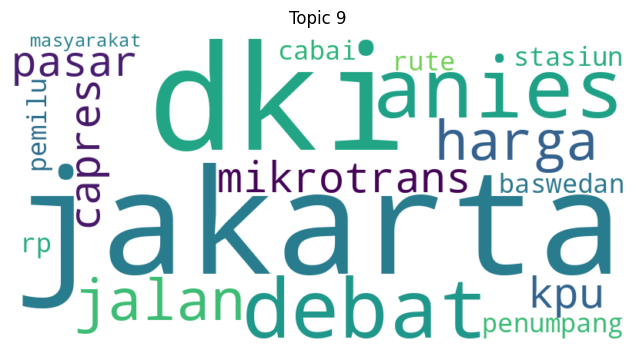

In [10]:
from sklearn.decomposition import TruncatedSVD
import numpy as np

# Define the number of topics
num_topics = 10

# Perform LSA
lsa_model = TruncatedSVD(n_components=num_topics, random_state=42)
lsa_train_features = lsa_model.fit_transform(tfidf_train_features)

# Get feature names from the TF-IDF vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Function to print the most important words for each topic
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

# Print the most important words for each topic
print("LSA Topics:")
print_top_words(lsa_model, feature_names, 10)

# Generate a word cloud for each topic
for i in range(num_topics):
    # Get the most important words for the topic
    top_words = [feature_names[j] for j in lsa_model.components_[i].argsort()[:-20 - 1:-1]]
    # Join them into a single string
    topic_text = ' '.join(top_words)
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(topic_text)
    # Display the generated image
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Topic ' + str(i))
    plt.axis('off')
    plt.show()


### Naiye Bayes

In [11]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

In [12]:
# Train Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(tfidf_train_features, y_train_encoded)

# Predict on test data
y_pred = nb_classifier.predict(tfidf_test_features)

# Calculate accuracy
accuracy = accuracy_score(y_test_encoded, y_pred) * 100
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = f1_score(y_test_encoded, y_pred, average='weighted') * 100
print("F1 Score:", f1)

Accuracy: 67.7784395473496
F1 Score: 66.85934009661297


#### Model SVM

In [13]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

# Initialize SVM model
svm_model = SVC(kernel='linear', random_state=42)

# Fit the model
svm_model.fit(tfidf_train_features, y_train_encoded)

# Predict on test data
y_pred = svm_model.predict(tfidf_test_features)

# Calculate accuracy
accuracy = accuracy_score(y_test_encoded, y_pred)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = f1_score(y_test_encoded, y_pred, average='weighted')
print("F1 Score:", f1)

Accuracy: 0.7695056581298392
F1 Score: 0.7675432994526872
